# Analysis of Shh target genes when Shh is conditionally knocked out of PV neurons
## Line profiles were taken from immuno images of Kir4.1, Glast, GlyT, and GAT3 using the associated imagej scripts

## Libraries

In [1]:
from profiles import profiles
from profiles.profiles import trace_per_animal, trace_per_animal_by_geno, plot_datapoints, grouped_ttests
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

## File Locations

In [2]:
animal_file = "../data/PV_Shh_1/EXP93_animal_meta.csv"
animal_meta = pd.read_csv(animal_file)
animal_meta['animal'] = animal_meta['animal'].astype(str)
data_path = "../data/PV_shh_1/"
zero = 0
subregions = {'SPy': np.r_[zero - 50:zero + 50],
           'periSPy': np.r_[zero - 150:zero - 50, zero + 50:zero + 150],
              'SO': np.r_[-400:-150],
              'SR': np.r_[100:500]
           }

In [3]:
print(animal_meta)

  animal                       full_geno    geno Unnamed: 3 collect_date  \
0  15527  PV+/Cre ; Shh+/+ ; Rosa26+/Tom  Shh+/+     female   2019-08-15   
1  15533  PV+/Cre ; Shh+/+ ; Rosa26+/Tom  Shh+/+       male   2019-08-15   
2  15534  PV+/Cre ; Shh+/+ ; Rosa26+/Tom  Shh+/+       male   2019-08-15   
3  15530  PV+/Cre ; Shhc/c ; Rosa26+/Tom  Shhc/c     female   2019-08-15   
4  15548  PV+/Cre ; Shhc/c ; Rosa26+/Tom  Shhc/c     female   2019-08-15   
5  15547  PV+/Cre ; Shhc/c ; Rosa26+/Tom  Shhc/c       male   2019-08-15   

   age_at_collection  from_cross                                 notes  
0                 68        2772                                   NaN  
1                 68        2772                                   NaN  
2                 68        2772                                   NaN  
3                 68        2772  may have perfused some water through  
4                 68        2780                                   NaN  
5                 68        2

## run data parsing over whole folder to generate the dataset object

In [4]:
PV = profiles.parse_data_folder(data_path, animal_meta)
# populate metadata slot on dataset object
PV.create_meta()
PV.meta.head()

,name,image,animal,geno,stain,region
0,None,15527_Glast_Tom_Kir_CA1_0001.oif,15527,Shh+/+,Glast,CA1
1,None,15527_Glast_Tom_Kir_CA1_0001.oif,15527,Shh+/+,Glast,CA1
2,None,15527_Glast_Tom_Kir_CA1_0001.oif,15527,Shh+/+,Glast,CA1
3,None,15527_Glast_Tom_Kir_CA1_0001.oif,15527,Shh+/+,Glast,CA1
4,None,15527_Glast_Tom_Kir_CA1_0001.oif,15527,Shh+/+,Glast,CA1


## Note: That there is a lower case CA1 to fix
There is only one region in this experiment so every region value will be set to "CA1".

In [5]:
PV.meta["region"].unique()

array(['CA1', 'ca1'], dtype=object)

In [6]:
PV.meta["region"] = "CA1"

In [7]:
PV.meta["region"].unique()

array(['CA1'], dtype=object)

## Generate a long dataframe of the dataset suitable for line plots

In [8]:
PV.data = PV.long()

/Users/wtf/.conda/envs/immuno_profile/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
# Fix the "ca1" in region
PV.data["region"] = "CA1"

In [10]:
PV.meta.groupby(["geno"]).nunique()

,name,image,animal,geno,stain,region
geno,,,,,,
Shh+/+,0,37,3,1,5,1
Shhc/c,0,36,3,1,5,1


## plot heatmaps

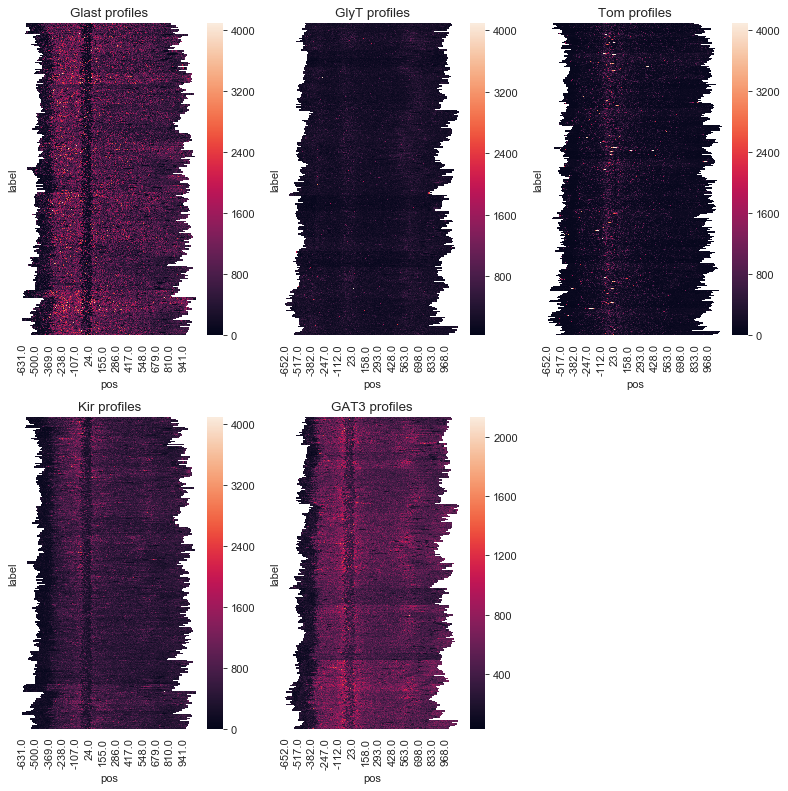

In [11]:
# import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

from profiles import profiles


for i, stain in enumerate(PV.meta['stain'].unique(), start=1):
    ax = fig.add_subplot(2,3, i)
    ax = profiles.plot_heatmap(PV.data, stain)
    i=i+1
fig.tight_layout()

In [12]:
fig.savefig("../figures/PV_geno_trace.pdf")

## line per animal

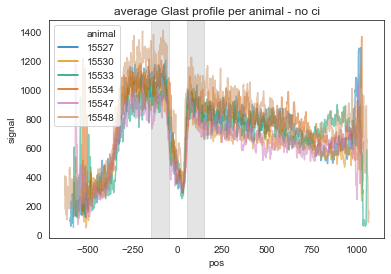

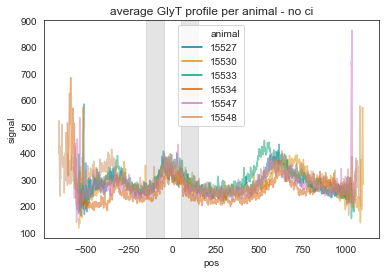

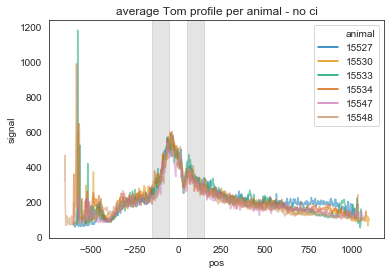

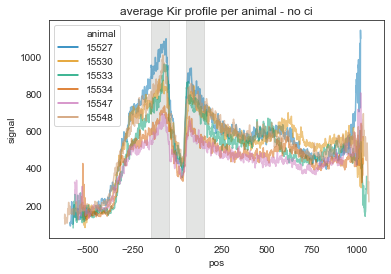

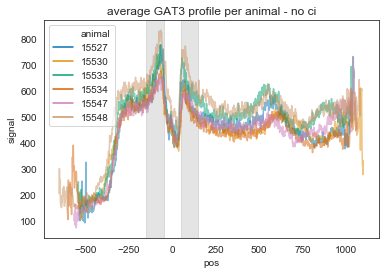

In [13]:
for stain in PV.meta['stain'].unique():
    trace_per_animal(PV.data, stain)
    plt.show()

## line per geno. n = number of animals

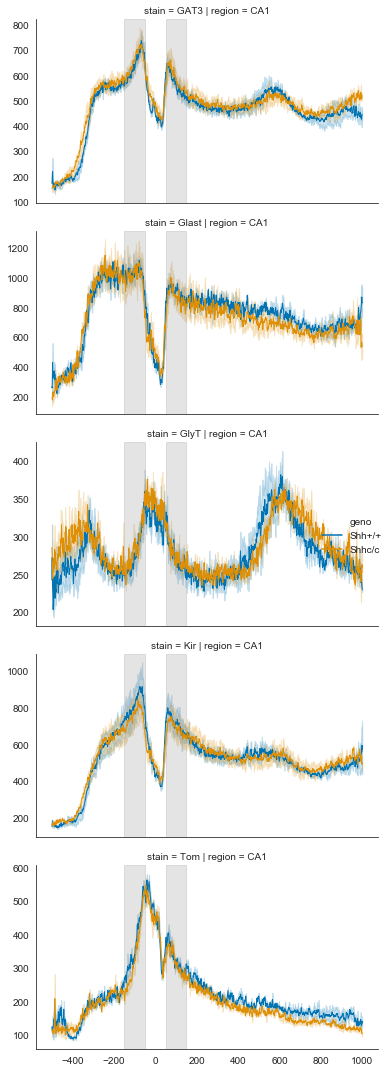

In [14]:
fig = trace_per_animal_by_geno(PV.data)

In [15]:
fig.savefig("../figures/PV_geno_trace002.pdf")

## Without 15530 (possible bad perfusion)

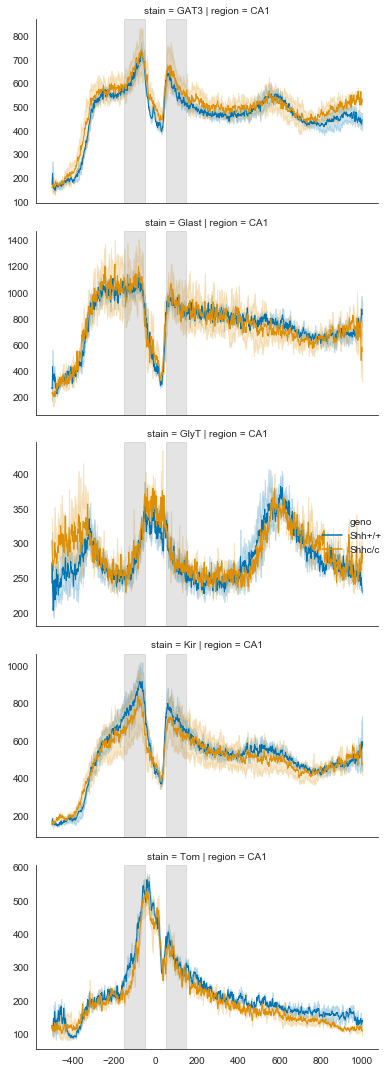

In [16]:
fig = trace_per_animal_by_geno(PV.data[PV.data["animal"] != "15530"])

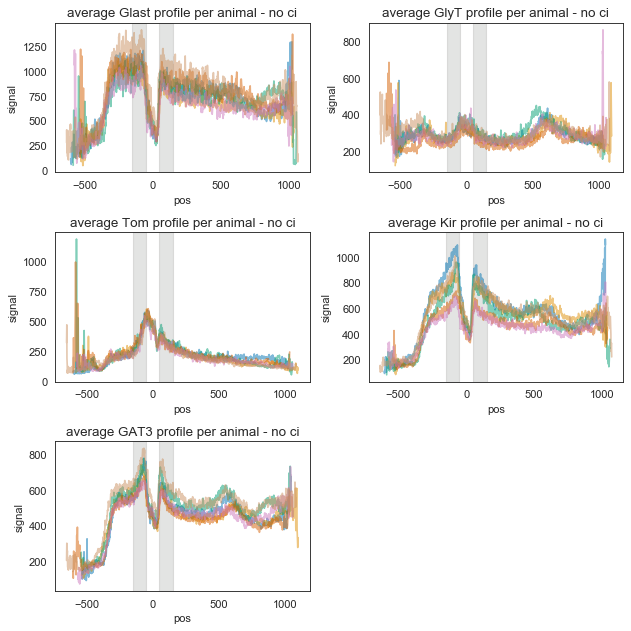

In [17]:
fig = plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

for i, stain in enumerate(PV.meta['stain'].unique(), start=1):
    ax = fig.add_subplot(3,2, i)
    ax = profiles.trace_per_animal(PV.data, stain)
    ax.get_legend().remove()
fig.tight_layout()
plt.show()

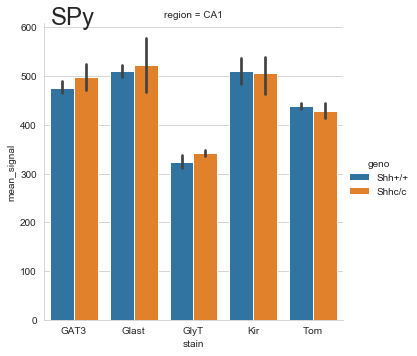

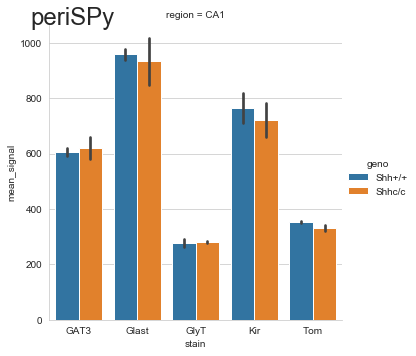

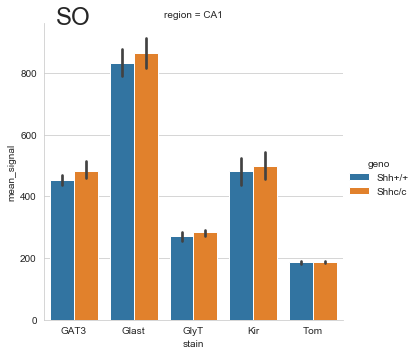

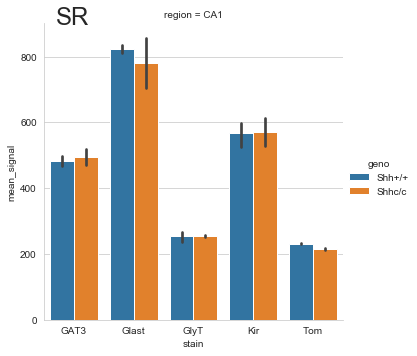

In [18]:
plot_datapoints(PV.data, subregions, style = "bar", save_prefix = "../figures/PV_Shh_1_bar_")

# Statistical tests
return a dataframe with the stats

In [19]:
grouped_ttests(PV.data[PV.data["animal"] != "15530"], subregions)

,stain,region,subregion,geno1,geno2,geno1_mean,geno2_mean,geno1_n,geno2_n,p-value
0,GAT3,CA1,SPy,Shh+/+,Shhc/c,475.136364,520.867035,3,2,0.271980
1,Glast,CA1,SPy,Shh+/+,Shhc/c,509.815677,542.348503,3,2,0.725649
2,GlyT,CA1,SPy,Shh+/+,Shhc/c,324.777893,348.260417,3,2,0.316448
3,Kir,CA1,SPy,Shh+/+,Shhc/c,510.565269,492.412855,3,2,0.787384
4,Tom,CA1,SPy,Shh+/+,Shhc/c,438.351404,420.885411,3,2,0.445081
5,GAT3,CA1,periSPy,Shh+/+,Shhc/c,604.977522,633.877094,3,2,0.629129
6,Glast,CA1,periSPy,Shh+/+,Shhc/c,958.614298,973.116520,3,2,0.899357
7,GlyT,CA1,periSPy,Shh+/+,Shhc/c,277.218948,282.347133,3,2,0.814234
8,Kir,CA1,periSPy,Shh+/+,Shhc/c,764.243952,696.440972,3,2,0.651844
9,Tom,CA1,periSPy,Shh+/+,Shhc/c,352.193745,318.962686,3,2,0.008296
